In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [23]:


test_accs_all = []
# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())


test_accs_all = np.array(test_accs_all)

0.04184
0.08312
0.11292
0.13448
0.1632


In [7]:


test_accs_all = []
# ckpts = ["110", "220", "331", "441", "550"]
# ckpts = ["220", "440", "660", "880", "1100"]
ckpts = ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs20"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())


test_accs_all = np.array(test_accs_all)

0.04595616024187453
0.09304610733182161
0.14852607709750568
0.23469387755102042
0.31746031746031744
0.4256235827664399
0.5462585034013605
0.6698412698412698
0.7863189720332577
0.8436885865457294


In [9]:


test_accs_all = []
# ckpts = ["110", "220", "331", "441", "550"]
# ckpts = ["220", "440", "660", "880", "1100"]
ckpts = [ "440", "880", "1320", "1760", "2200"]

for ckpt in ckpts:
    name = "math_aug3_rand_50_unmemorized_eq_50_total5292_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())


test_accs_all = np.array(test_accs_all)

0.05808
0.15776
0.34084
0.5972
0.74016


In [ ]:
#  10 epochs
# 5, 4, 3, 2, 1

In [4]:


test_accs_all2 = []
# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    # name = "math_aug3_rand2646_total2646_epochs10"
    name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all2.append(test_accs.mean())


test_accs_all2 = np.array(test_accs_all2)

0.04044
0.04836
0.05592
0.06212
0.06364


In [8]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [32]:
name = "math_aug3_rand2646_total2646_epochs10"
# name = "math_aug3_unmemorized_eq_0_total2646_epochs10"

subsample_idxs = np.load("ckpts/"+name+"/subsample_idxs.npy")

name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
subsample_idxs2 = np.load("ckpts/"+name+"/subsample_idxs.npy")

In [20]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    train_correct = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [33]:
num_memorized_all2 = []
num_correct_different_all2 = []
num_incorrect_all2 = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    # name = "math_aug3_rand2646_total2646_epochs10"
    name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    train_correct = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs2[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all2.append(num_memorized_ckpt)
    num_correct_different_all2.append(num_correct_different_ckpt)
    num_incorrect_all2.append(num_incorrect_ckpt)
    
num_memorized_all2 = np.array(num_memorized_all2)
num_correct_different_all2 = np.array(num_correct_different_all2)
num_incorrect_all2 = np.array(num_incorrect_all2)

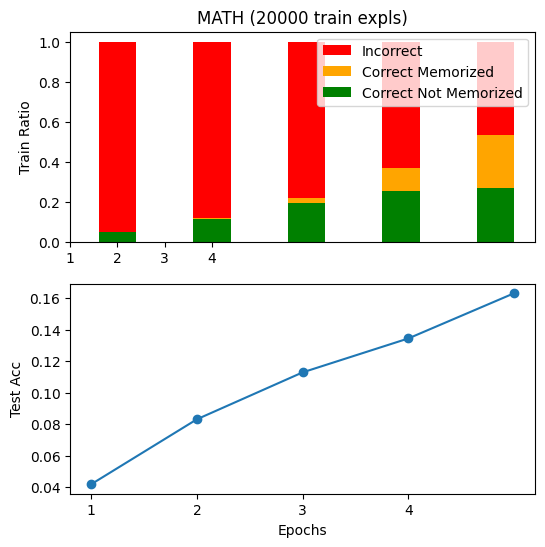

In [24]:
# make 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, 6)], [1 for i in range(5)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, 6)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(5)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, 6)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(5)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([i for i in range(1, 5)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (20000 train expls)")
ax1.legend()

ax2.plot([i for i in range(1, 6)], test_accs_all, "o-")
ax2.set_xticks([i for i in range(1, 5)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

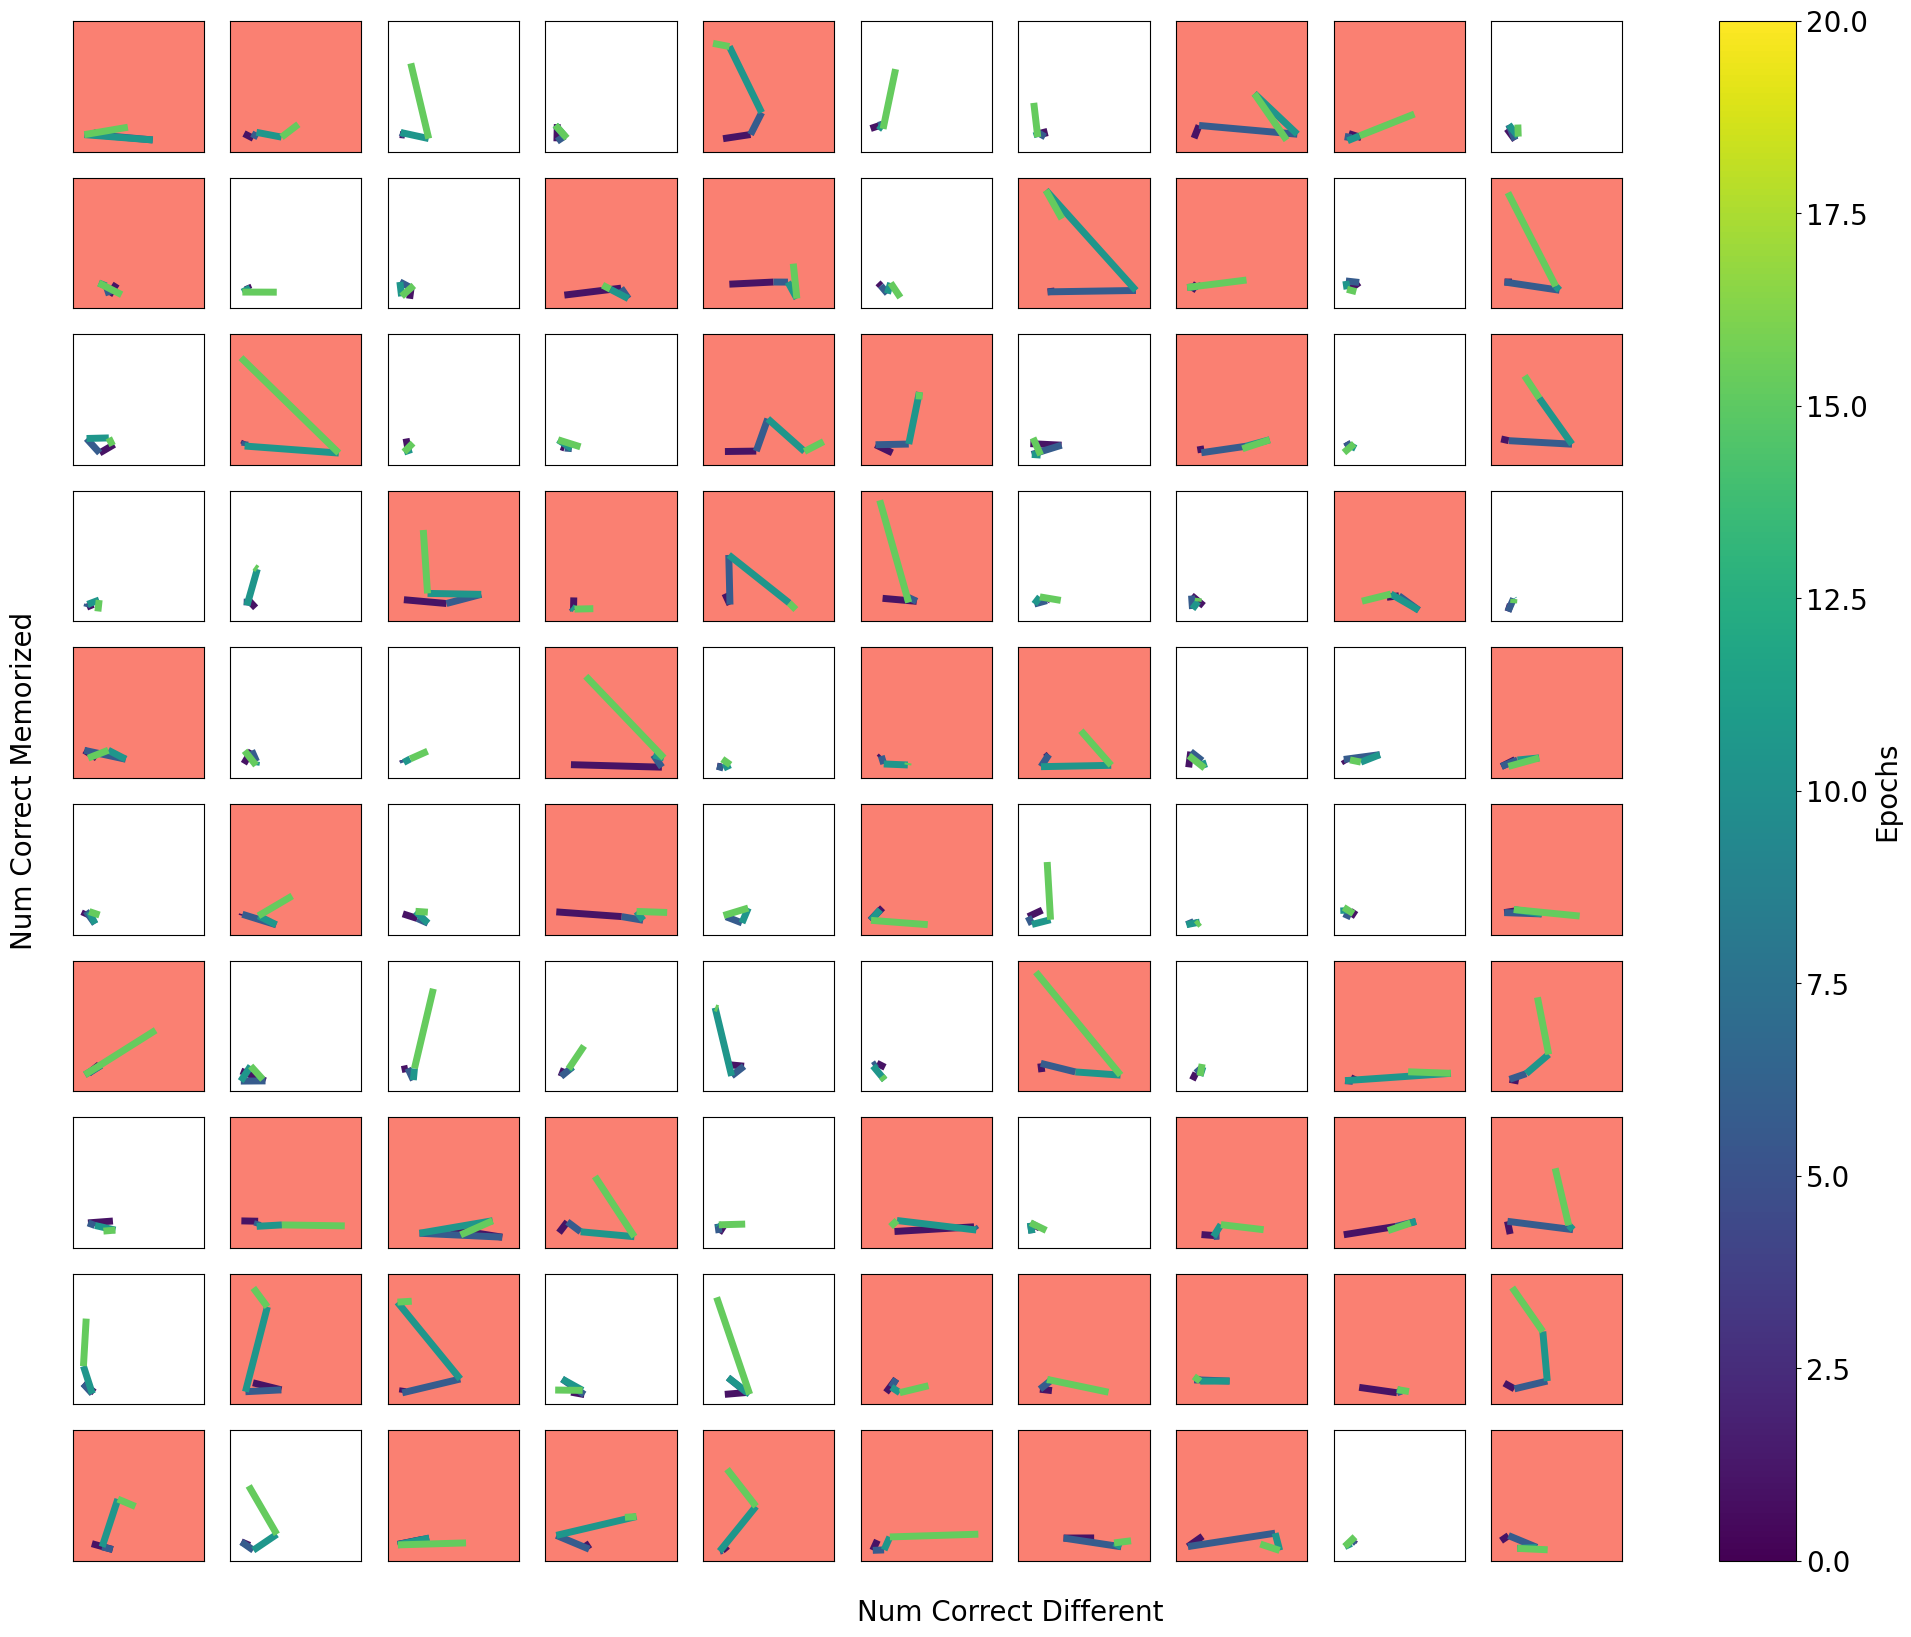

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 5)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, 5)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, 5)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


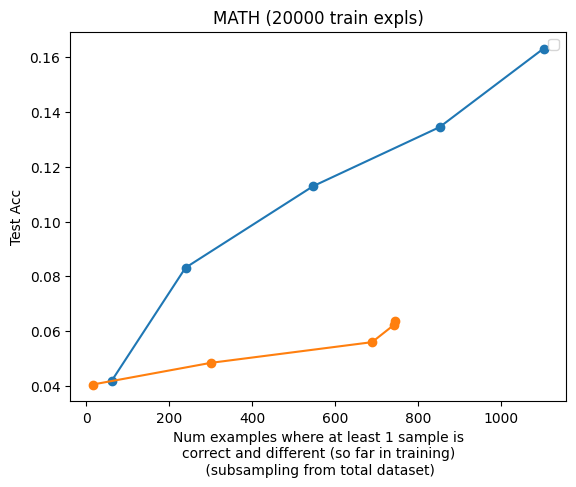

In [58]:
cummulative_num_correct_different = []
cummulative_num_memorized = []
for i in range(5):
    cummulative_num_correct_different.append((num_correct_different_all[:i+1].max(axis=0)>=3).sum())
    cummulative_num_memorized.append(((num_memorized_all[:i+1]).max(axis=0)>=5).sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1].sum())
cummulative_num_correct_different=np.array(cummulative_num_correct_different)
cummulative_num_memorized=np.array(cummulative_num_memorized)

cummulative_num_correct_different2= []
cummulative_num_memorized2 = []
for i in range(5):
    cummulative_num_correct_different2.append((num_correct_different_all2[:i+1].max(axis=0)>=3).sum())
    cummulative_num_memorized2.append(((num_memorized_all2[:i+1]).max(axis=0)>=5).sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1].sum())
cummulative_num_correct_different2 = np.array(cummulative_num_correct_different2)
cummulative_num_memorized2 = np.array(cummulative_num_memorized2)

# plt.plot(cummulative_num_correct_different, test_accs_all, "o-")
plt.plot(cummulative_num_correct_different, test_accs_all, "o-")
plt.plot(cummulative_num_correct_different2, test_accs_all2, "o-")

# plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()

# plt.plot([417, 1424, 2263, 2852, 3204, 3329, 3360], [0.1282 , 0.13368, 0.14536, 0.1474 , 0.14704, 0.1598 , 0.16456], "o-")

plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (20000 train expls)")
plt.savefig("delete.png")

In [ ]:
# ratio of examples

In [ ]:
# train for longer
# train without memorized examples?